<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/clustering/iris_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.drop(['Id', 'Species'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)

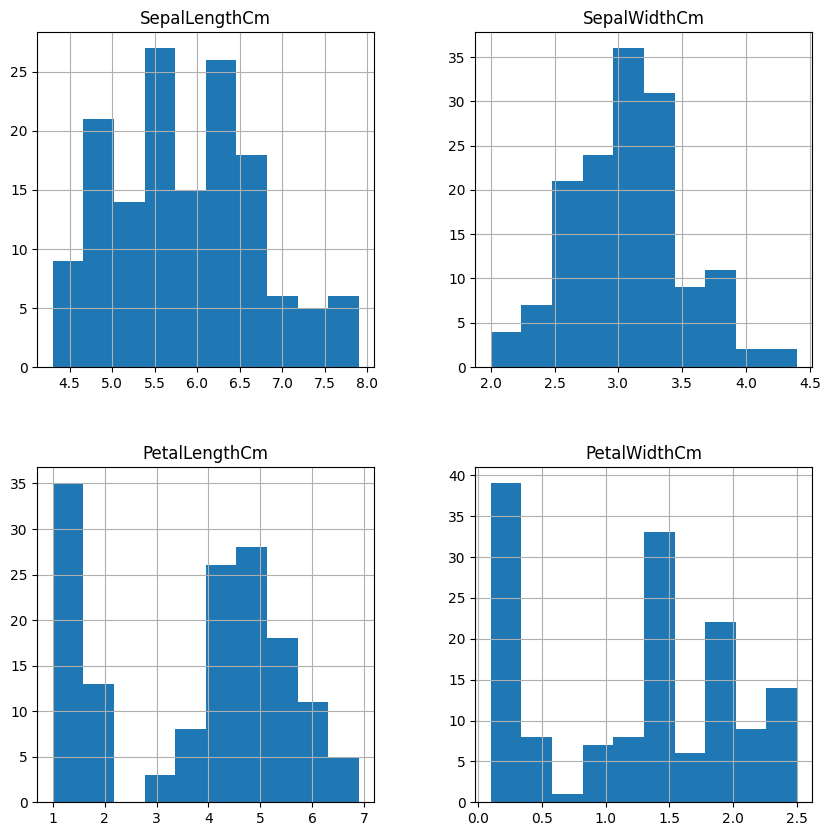

In [ ]:
df.hist(figsize=(10,10))
plt.show()

In [ ]:
x =df.iloc[:,:]

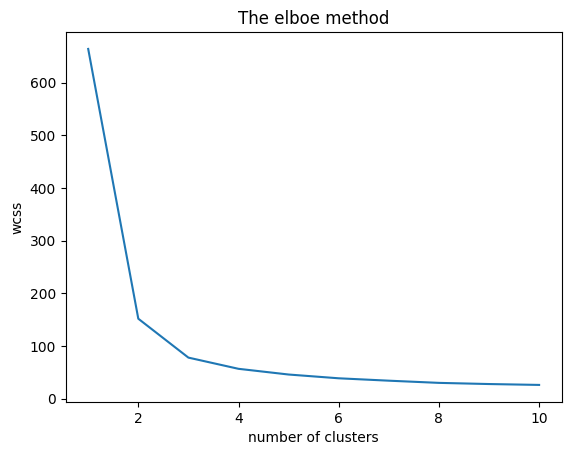

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elboe method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


In [ ]:
kmean = KMeans(n_clusters=3)
kmean.fit(x)

y_pred = kmean.predict(x)

In [ ]:
wscc = kmean.inertia_
wscc

77.91989035087717

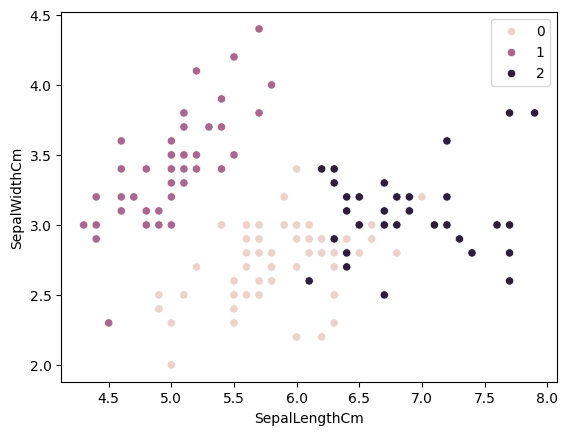

In [ ]:
sns.scatterplot(x=x['SepalLengthCm'], y=x['SepalWidthCm'], hue=y_pred)
plt.show()

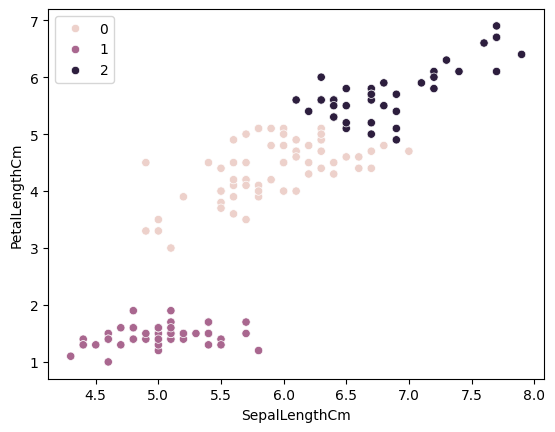

In [ ]:
sns.scatterplot(x=x['SepalLengthCm'], y=x['PetalLengthCm'], hue=y_pred)
plt.show()

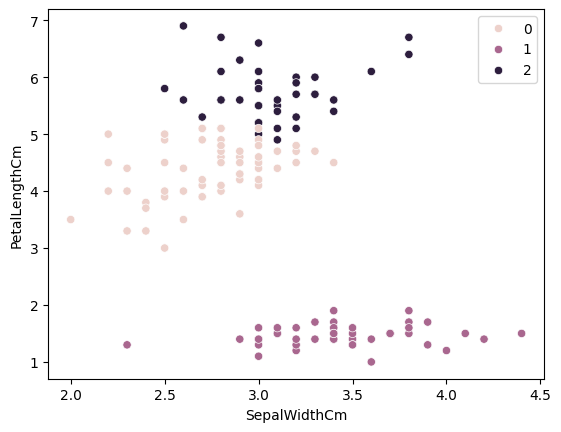

In [ ]:
sns.scatterplot(x=x['SepalWidthCm'], y=x['PetalLengthCm'], hue=y_pred)
plt.show()

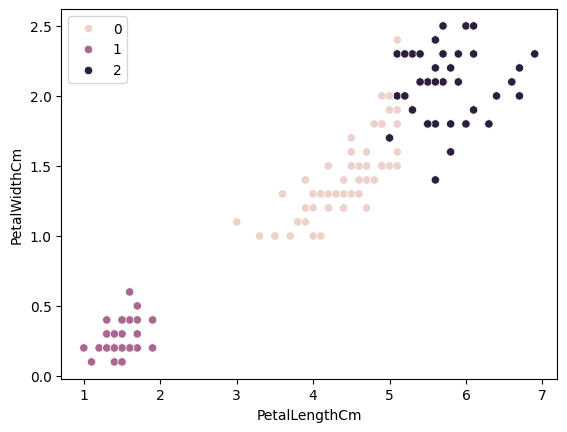

In [ ]:
sns.scatterplot(x=x.iloc[:,2], y=x.iloc[:,3], hue=y_pred)
plt.show()

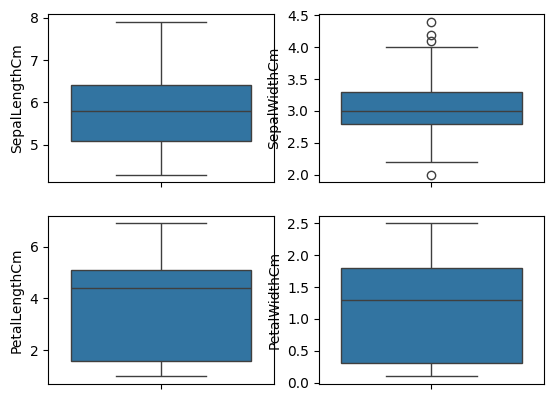

In [ ]:
n = 1
for col in x.columns:
  plt.subplot(2,2,n)
  sns.boxplot(x[col])
  n+=1
plt.show()

In [ ]:
x_new = x[(x['SepalWidthCm'] < 4) & (x['SepalLengthCm'] > 2.5)]
x_new.shape

(143, 4)

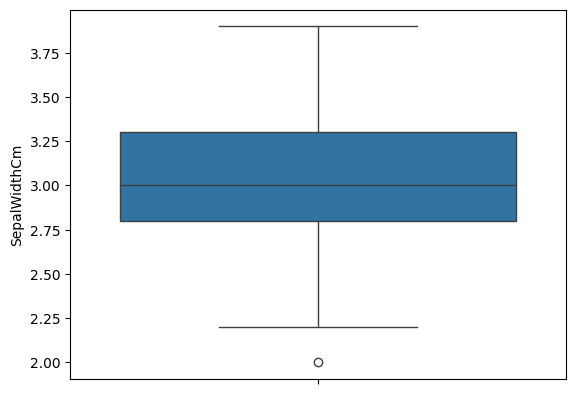

In [ ]:
sns.boxplot(x_new['SepalWidthCm'])
plt.show()

In [ ]:
kmean1 = KMeans(n_clusters=3)
kmean1.fit(x_new)

wscc_new = kmean1.inertia_
wscc_new

73.81083732057417

In [ ]:
y = kmean1.predict(x_new)

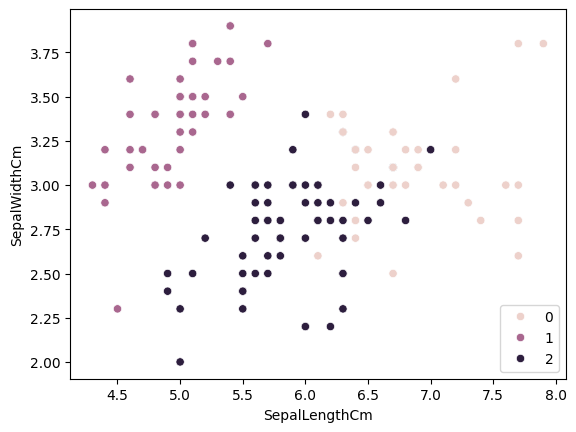

In [ ]:
sns.scatterplot(x=x_new['SepalLengthCm'], y=x_new['SepalWidthCm'], hue=y)
plt.show()

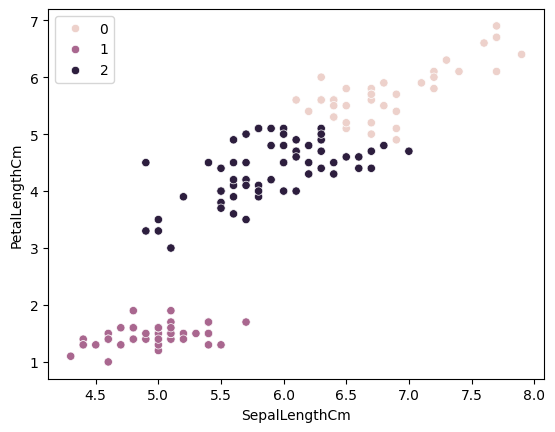

In [ ]:
sns.scatterplot(x=x_new['SepalLengthCm'], y=x_new['PetalLengthCm'], hue=y)
plt.show()